In [1]:
!pip install tqdm

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [58]:
import numpy as np
import matplotlib.pyplot as plt
import keras

from PIL import Image, ImageDraw, ImageFont
from tqdm import tqdm_notebook

%matplotlib inline

In [59]:
batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28, 28

n = int(2e4)

# Synthetic Image Generation

In [113]:
synth_digits = np.random.randint(0,10, size=n)
rotations = np.random.randint(-5,5, size=n)
size = np.random.randint(24,30, size=n)

synth_images = np.zeros(shape=[n,1,img_rows,img_rows])

for i,(digit,rot,s) in tqdm_notebook(enumerate(zip(synth_digits, rotations, size))):
    img = Image.new('RGB', (img_rows, img_rows), color = (0,0,0))
 
    fnt = ImageFont.truetype('/usr/share/fonts/dejavu/DejaVuSans.ttf', s)
    d = ImageDraw.Draw(img)
    d.text((5,1), str(digit), font=fnt, fill=(255,255,255))

    img = img.rotate(rot).convert('L')
    synth_images[i,0] = img

In [114]:
x_synth = synth_images.astype('float32')
x_synth -= 127.5
x_synth /= 127.5

y_synth = keras.utils.to_categorical(synth_digits, num_classes)

In [115]:
x_synth.shape

(20000, 1, 28, 28)

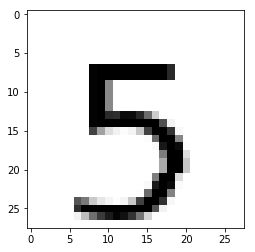

In [116]:
plt.imshow(x_synth[0,0], cmap='Greys')

# MNIST Data Loading

In [117]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# channels first
x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train -= 127.5
x_train /= 127.5
x_test -= 127.5
x_test /= 127.5

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

input_shape = (1, img_rows, img_cols)

x_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples


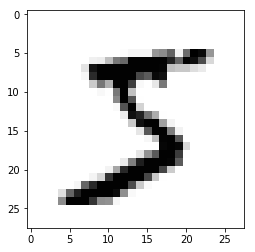

In [118]:
plt.imshow(x_train[0,0], cmap='Greys')

# Simple MNIST CNN

In [119]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape, data_format='channels_first'))
model.add(Conv2D(64, (3, 3), activation='relu', data_format='channels_first'))
model.add(MaxPooling2D(pool_size=(2, 2), data_format='channels_first'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 164us/step - loss: 0.2329 - acc: 0.9281 - val_loss: 0.0474 - val_acc: 0.9853
Epoch 2/12
60000/60000 [==============================] - 8s 133us/step - loss: 0.0799 - acc: 0.9758 - val_loss: 0.0469 - val_acc: 0.9839
Epoch 3/12
60000/60000 [==============================] - 8s 133us/step - loss: 0.0607 - acc: 0.9812 - val_loss: 0.0284 - val_acc: 0.9901
Epoch 4/12
60000/60000 [==============================] - 8s 133us/step - loss: 0.0507 - acc: 0.9848 - val_loss: 0.0295 - val_acc: 0.9902
Epoch 5/12
60000/60000 [==============================] - 8s 133us/step - loss: 0.0435 - acc: 0.9867 - val_loss: 0.0275 - val_acc: 0.9908
Epoch 6/12
60000/60000 [==============================] - 8s 133us/step - loss: 0.0376 - acc: 0.9886 - val_loss: 0.0258 - val_acc: 0.9918
Epoch 7/12
60000/60000 [==============================] - 8s 133us/step - loss: 0.0338 - acc: 0.9896 - val_loss: 0.0251 -

# MNIST CNN Trained Only On Synthetic Data

In [146]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape, data_format='channels_first'))
model.add(Conv2D(64, (3, 3), activation='relu', data_format='channels_first'))
model.add(MaxPooling2D(pool_size=(2, 2), data_format='channels_first'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_synth, y_synth,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 20000 samples, validate on 10000 samples
Epoch 1/12
20000/20000 [==============================] - 6s 299us/step - loss: 0.1295 - acc: 0.9600 - val_loss: 5.4549 - val_acc: 0.2819
Epoch 2/12
20000/20000 [==============================] - 3s 151us/step - loss: 0.0010 - acc: 0.9999 - val_loss: 6.5589 - val_acc: 0.2534
Epoch 3/12
20000/20000 [==============================] - 3s 152us/step - loss: 4.7500e-04 - acc: 1.0000 - val_loss: 7.5495 - val_acc: 0.2627
Epoch 4/12
20000/20000 [==============================] - 3s 151us/step - loss: 3.2088e-04 - acc: 0.9999 - val_loss: 7.4915 - val_acc: 0.2667
Epoch 5/12
20000/20000 [==============================] - 3s 152us/step - loss: 1.7282e-04 - acc: 1.0000 - val_loss: 7.7158 - val_acc: 0.2756
Epoch 6/12
20000/20000 [==============================] - 3s 152us/step - loss: 1.8956e-04 - acc: 1.0000 - val_loss: 7.6882 - val_acc: 0.2788
Epoch 7/12
20000/20000 [==============================] - 3s 153us/step - loss: 2.6046e-04 - acc: 0.9999 -

# SimGAN

https://github.com/mjdietzx/SimGAN/blob/master/sim-gan.py

GAN architecture adapted from https://github.com/Zackory/Keras-MNIST-GAN

In [121]:
class ImageHistoryBuffer(object):
    def __init__(self, shape, max_size, batch_size):
        """
        Initialize the class's state.

        :param shape: Shape of the data to be stored in the image history buffer
                      (i.e. (0, img_height, img_width, img_channels)).
        :param max_size: Maximum number of images that can be stored in the image history buffer.
        :param batch_size: Batch size used to train GAN.
        """
        self.image_history_buffer = np.zeros(shape=shape)
        self.max_size = max_size
        self.batch_size = batch_size

    def add_to_image_history_buffer(self, images, nb_to_add=None):
        """
        To be called during training of GAN. By default add batch_size // 2 images to the image history buffer each
        time the generator generates a new batch of images.

        :param images: Array of images (usually a batch) to be added to the image history buffer.
        :param nb_to_add: The number of images from `images` to add to the image history buffer
                          (batch_size / 2 by default).
        """
        if not nb_to_add:
            nb_to_add = self.batch_size // 2

        if len(self.image_history_buffer) < self.max_size:
            np.append(self.image_history_buffer, images[:nb_to_add], axis=0)
        elif len(self.image_history_buffer) == self.max_size:
            self.image_history_buffer[:nb_to_add] = images[:nb_to_add]
        else:
            assert False

        np.random.shuffle(self.image_history_buffer)

    def get_from_image_history_buffer(self, nb_to_get=None):
        """
        Get a random sample of images from the history buffer.

        :param nb_to_get: Number of images to get from the image history buffer (batch_size / 2 by default).
        :return: A random sample of `nb_to_get` images from the image history buffer, or an empty np array if the image
                 history buffer is empty.
        """
        if not nb_to_get:
            nb_to_get = self.batch_size // 2

        try:
            return self.image_history_buffer[:nb_to_get]
        except IndexError:
            return np.zeros(shape=0)

In [172]:
import tensorflow as tf
from keras import initializers
from keras.layers import LeakyReLU

def resnet_block(input_features, nb_features=64, nb_kernel_rows=3, nb_kernel_cols=3):
    y = Conv2D(nb_features, (nb_kernel_rows, nb_kernel_cols), border_mode='same', data_format='channels_first')(input_features)
    y = Activation('relu')(y)
    y = Conv2D(nb_features, (nb_kernel_rows, nb_kernel_cols), border_mode='same', data_format='channels_first')(y)

    y = add([input_features, y])
    return Activation('relu')(y)    

def refiner_network(input_image_tensor):
    x = Conv2D(64, (3, 3), border_mode='same', activation='relu', data_format='channels_first')(input_image_tensor)

    # the output is passed through 4 ResNet blocks
    for _ in range(4):
        x = resnet_block(x)
        
    return Conv2D(1, (1, 1), border_mode='same', activation='tanh', data_format='channels_first')(x)

def refiner_network_simple(input_image_tensor):
    x = Reshape((-1,784))(input_image_tensor)
    x = Dense(256, kernel_initializer=initializers.RandomNormal(stddev=0.02))(x)
    x = LeakyReLU(0.2)(x)
    x = Dense(512)(x)
    x = LeakyReLU(0.2)(x)
    x = Dense(1024)(x)
    x = LeakyReLU(0.2)(x)
    x = Dense(784)(x)
    
    return Reshape((-1,28,28))(x)

def discriminator_network(input_image_tensor):
    x = Conv2D(96, (3, 3), padding='same', strides=(2, 2), activation='relu', data_format='channels_first')(input_image_tensor)
    x = Conv2D(64, (3, 3), padding='same', strides=(2, 2), activation='relu', data_format='channels_first')(x)
    x = MaxPooling2D(pool_size=(3, 3), padding='same', strides=(1, 1), data_format='channels_first')(x)
    x = Conv2D(32, (3, 3), padding='same', strides=(1, 1), activation='relu', data_format='channels_first')(x)
    x = Conv2D(32, (1, 1), padding='same', strides=(1, 1), activation='relu', data_format='channels_first')(x)
    x = Conv2D(2, (1, 1), padding='same', strides=(1, 1), activation='relu', data_format='channels_first')(x)

    # here one feature map corresponds to `is_real` and the other to `is_refined`,
    # and the custom loss function is then `tf.nn.sparse_softmax_cross_entropy_with_logits`
    return Reshape((-1, 2))(x)

def discriminator_network_simple(input_image_tensor):
    x = Conv2D(64, (3, 3), padding='same', strides=(2, 2), activation='relu', data_format='channels_first')(input_image_tensor)
    x = MaxPooling2D(pool_size=(3, 3), padding='same', strides=(1, 1), data_format='channels_first')(x)
    x = Conv2D(32, (1, 1), padding='same', strides=(1, 1), activation='relu', data_format='channels_first')(x)
    x = Conv2D(2, (1, 1), padding='same', strides=(1, 1), activation='relu', data_format='channels_first')(x)
    return Reshape((-1, 2))(x)
    
# define custom l1 loss function for the refiner
def self_regularization_loss(y_true, y_pred):
    delta = 0.0001
    return tf.multiply(delta, tf.reduce_sum(tf.abs(y_pred - y_true)))

# define custom local adversarial loss (softmax for each image section) for the discriminator
# the adversarial loss function is the sum of the cross-entropy losses over the local patches
def local_adversarial_loss(y_true, y_pred):
    # y_true and y_pred have shape (batch_size, # of local patches, 2), but really we just want to average over
    # the local patches and batch size so we can reshape to (batch_size * # of local patches, 2)
    y_true = tf.reshape(y_true, (-1, 2))
    y_pred = tf.reshape(y_pred, (-1, 2))
    loss = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred)

    return tf.reduce_mean(loss)

## SimGAN w/ simple networks from MNIST GAN

In [274]:
from keras.layers import Input, Activation, add, Reshape
from keras.models import Model
from keras.optimizers import SGD, Adam

synthetic_image_tensor = Input(shape=(1, img_rows, img_cols))
refined_image_tensor = refiner_network_simple(synthetic_image_tensor)
refiner_model = Model(
    inputs=synthetic_image_tensor, 
    outputs=refined_image_tensor, 
    name='refiner'
)
print('Refiner')
print(refiner_model.summary())

refined_or_real_image_tensor = Input(shape=(1, img_rows, img_cols))
discriminator_output = discriminator_network_simple(refined_or_real_image_tensor)
discriminator_model = Model(
    inputs=refined_or_real_image_tensor,
    outputs=discriminator_output,
    name='discriminator'
)
print('Discriminator')
print(discriminator_model.summary())

# combined must output the refined image along w/ 
# the disc's classification of it for the refiner's 
# self-reg loss
refiner_model_output = refiner_model(synthetic_image_tensor)
combined_output = discriminator_model(refiner_model_output)
combined_model = Model(inputs=synthetic_image_tensor, outputs=[refiner_model_output, combined_output],
                              name='combined')

discriminator_model_output_shape = discriminator_model.output_shape

print('Combined')
print(combined_model.summary())

sgd = SGD(lr=0.001)
adam = Adam(lr=0.0002, beta_1=0.5)

refiner_model.compile(optimizer=adam, loss=self_regularization_loss)
discriminator_model.compile(optimizer=sgd, loss=local_adversarial_loss)
discriminator_model.trainable = False
combined_model.compile(optimizer=sgd, loss=[self_regularization_loss, local_adversarial_loss])


# the target labels for the cross-entropy loss layer are 0 for every yj (real) and 1 for every xi (refined)
y_real = np.array([[[1.0, 0.0]] * discriminator_model_output_shape[1]] * batch_size)
y_refined = np.array([[[0.0, 1.0]] * discriminator_model_output_shape[1]] * batch_size)
assert y_real.shape == (batch_size, discriminator_model_output_shape[1], 2)

# we first train the Rθ network with just self-regularization loss for 1,000 steps
print('pre-training the refiner network...')
gen_loss = []

log_interval = 100

def data_generator_fn(df, batch_size):
    while True:
        n_steps = df.shape[0] // batch_size
        for i in range(n_steps):
            yield df[(i*batch_size):((i+1)*batch_size)]
        
real_generator = data_generator_fn(x_train, batch_size)
synthetic_generator = data_generator_fn(x_synth, batch_size)

for i in range(1000):
    synthetic_image_batch = next(synthetic_generator)
    loss = refiner_model.train_on_batch(synthetic_image_batch, synthetic_image_batch)
    gen_loss.append(loss)

    # log every `log_interval` steps
    if not i % log_interval:
        figure_name = 'refined_image_batch_pre_train_step_{}.png'.format(i)
        print('Saving batch of refined images during pre-training at step: {}.'.format(i))

        synthetic_image_batch = next(synthetic_generator)
        #plot_image_batch_w_labels.plot_batch(
        #    np.concatenate((synthetic_image_batch, refiner_model.predict_on_batch(synthetic_image_batch))),
        #    os.path.join(cache_dir, figure_name),
        #    label_batch=['Synthetic'] * batch_size + ['Refined'] * batch_size)

        print('Refiner model self regularization loss: {}.'.format(gen_loss[i]))

#refiner_model.save(os.path.join(cache_dir, 'refiner_model_pre_trained.h5'))

# and Dφ for 200 steps (one mini-batch for refined images, another for real)
print('pre-training the discriminator network...')
disc_loss = []
   
for i in range(100):
    real_image_batch = next(real_generator)
    loss = discriminator_model.train_on_batch(real_image_batch, y_real)
    #disc_loss.append(loss)
    #print('Discriminator loss: {}'.format(disc_loss[i]))

    synthetic_image_batch = next(synthetic_generator)
    refined_image_batch = refiner_model.predict_on_batch(synthetic_image_batch)
    loss = discriminator_model.train_on_batch(refined_image_batch, y_refined)
    disc_loss.append(loss)
    print('Discriminator loss: {}'.format(disc_loss[i]))
    
#discriminator_model.save(os.path.join(cache_dir, 'discriminator_model_pre_trained.h5'))

print('Discriminator model loss: {}.'.format(disc_loss[-1]))

image_history_buffer = ImageHistoryBuffer((0, 1, img_rows, img_cols), batch_size * 100, batch_size)

Refiner
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        (None, 1, 28, 28)         0         
_________________________________________________________________
reshape_36 (Reshape)         (None, 1, 784)            0         
_________________________________________________________________
dense_68 (Dense)             (None, 1, 256)            200960    
_________________________________________________________________
leaky_re_lu_31 (LeakyReLU)   (None, 1, 256)            0         
_________________________________________________________________
dense_69 (Dense)             (None, 1, 512)            131584    
_________________________________________________________________
leaky_re_lu_32 (LeakyReLU)   (None, 1, 512)            0         
_________________________________________________________________
dense_70 (Dense)             (None, 1, 1024)           525312    
__

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Discriminator loss: 0.693117082118988
Discriminator loss: 0.6931298971176147
Discriminator loss: 0.6931402087211609
Discriminator loss: 0.6931002736091614
Discriminator loss: 0.6930593252182007
Discriminator loss: 0.693006694316864
Discriminator loss: 0.6932171583175659
Discriminator loss: 0.693122923374176
Discriminator loss: 0.6930294632911682
Discriminator loss: 0.6931822896003723
Discriminator loss: 0.6930819153785706
Discriminator loss: 0.6930308938026428
Discriminator loss: 0.6930354237556458
Discriminator loss: 0.6930971145629883
Discriminator loss: 0.6930001974105835
Discriminator loss: 0.6931971907615662
Discriminator loss: 0.6930451393127441
Discriminator loss: 0.6931896805763245
Discriminator loss: 0.6930445432662964
Discriminator loss: 0.6929593682289124
Discriminator loss: 0.6930071711540222
Discriminator loss: 0.693076491355896
Discriminator loss: 0.692851185798645
Discriminator loss: 0.6932634115219116
Discriminator loss: 0.6931300163269043
Discriminator loss: 0.69293546

In [ ]:
combined_loss = []
disc_loss_real = []
disc_loss_refined = []

log_interval = 100
nb_steps = 50000 # at 200k and still room for improvement, very little change to refined image
k_d = 1  # number of discriminator updates per step
k_g = 2  # number of generative network updates per step

In [231]:
# see Algorithm 1 in https://arxiv.org/pdf/1612.07828v1.pdf
for i in range(nb_steps):
    # train the refiner
    for _ in range(k_g):
        # sample a mini-batch of synthetic images
        synthetic_image_batch = next(synthetic_generator)

        # update θ by taking an SGD step on mini-batch loss LR(θ)
        loss = combined_model.train_on_batch(synthetic_image_batch,
                                                             [synthetic_image_batch, y_real])
        combined_loss.append(loss)

    for _ in range(k_d):
        # sample a mini-batch of synthetic and real images
        synthetic_image_batch = next(synthetic_generator)
        real_image_batch = next(real_generator)

        # refine the synthetic images w/ the current refiner
        refined_image_batch = refiner_model.predict_on_batch(synthetic_image_batch)

        # use a history of refined images
        half_batch_from_image_history = image_history_buffer.get_from_image_history_buffer()
        image_history_buffer.add_to_image_history_buffer(refined_image_batch)

        if len(half_batch_from_image_history):
            refined_image_batch[:batch_size // 2] = half_batch_from_image_history

        # update φ by taking an SGD step on mini-batch loss LD(φ)
        loss = discriminator_model.train_on_batch(real_image_batch, y_real)
        disc_loss_real.append(loss)
        loss = discriminator_model.train_on_batch(refined_image_batch, y_refined)
        disc_loss_refined.append(loss)

    if not i % log_interval:
        print('Step: {} of {}.'.format(i, nb_steps))
        
        # plot batch of refined images w/ current refiner
        figure_name = 'refined_image_batch_step_{}.png'.format(i)
        #print('Saving batch of refined images at adversarial step: {}.'.format(i))

        synthetic_image_batch = next(synthetic_generator)
        #plot_image_batch_w_labels.plot_batch(
        #    np.concatenate((synthetic_image_batch, refiner_model.predict_on_batch(synthetic_image_batch))),
        #    os.path.join(cache_dir, figure_name),
        #    label_batch=['Synthetic'] * batch_size + ['Refined'] * batch_size)

        # log loss summary
        print('Refiner model loss: {}.'.format(combined_loss[-1]))
        print('Discriminator model loss real: {}.'.format(disc_loss_real[-1]))
        print('Discriminator model loss refined: {}.'.format(disc_loss_refined[-1]))

        # save model checkpoints
        #model_checkpoint_base_name = os.path.join(cache_dir, '{}_model_step_{}.h5')
        #refiner_model.save(model_checkpoint_base_name.format('refiner', i))
        #discriminator_model.save(model_checkpoint_base_name.format('discriminator', i))

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Step: 0 of 50000.
Refiner model loss: [0.93604624, 0.20940942, 0.7266368].
Discriminator model loss real: 0.6978574991226196.
Discriminator model loss refined: 0.6763623356819153.
Step: 100 of 50000.
Refiner model loss: [0.9258815, 0.20194672, 0.72393477].
Discriminator model loss real: 0.6933439373970032.
Discriminator model loss refined: 0.6712679266929626.
Step: 200 of 50000.
Refiner model loss: [0.8921022, 0.16582368, 0.7262785].
Discriminator model loss real: 0.6964350938796997.
Discriminator model loss refined: 0.6760300397872925.
Step: 300 of 50000.
Refiner model loss: [0.9069815, 0.18026213, 0.7267194].
Discriminator model loss real: 0.6951243877410889.
Discriminator model loss refined: 0.6749999523162842.
Step: 400 of 50000.
Refiner model loss: [0.933993, 0.20693564, 0.72705734].
Discriminator model loss real: 0.6923947930335999.
Discriminator model loss refined: 0.6730781197547913.
Step: 500 of 50000.
Refiner model loss: [0.93734413, 0.20802258, 0.72932154].
Discriminator mod

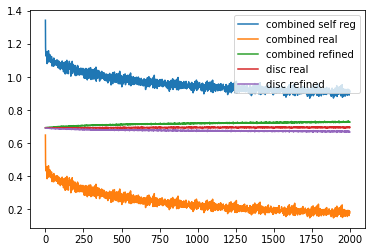

In [232]:
plt.plot([x[0] for x in combined_loss[::(k_g*log_interval)]], label='combined self reg')
plt.plot([x[1] for x in combined_loss[::(k_g*log_interval)]], label='combined real')
plt.plot([x[2] for x in combined_loss[::(k_g*log_interval)]], label='combined refined')
plt.plot(disc_loss_real[::k_d*log_interval], label='disc real')
plt.plot(disc_loss_refined[::k_d*log_interval], label='disc refined')
plt.legend()

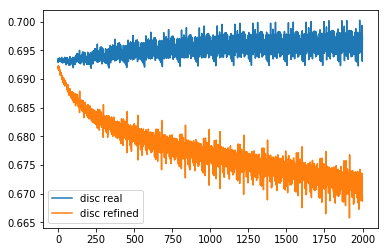

In [233]:
plt.plot(disc_loss_real[::log_interval], label='disc real')
plt.plot(disc_loss_refined[::log_interval], label='disc refined')
plt.legend()

In [234]:
synthetic_image_batch = next(synthetic_generator)
refined_batch = refiner_model.predict_on_batch(synthetic_image_batch)

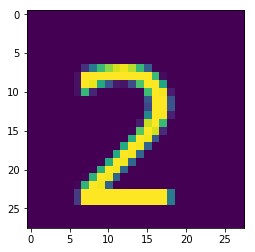

In [235]:
plt.imshow(synthetic_image_batch[0,0])

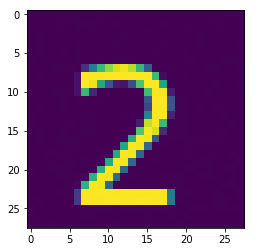

In [236]:
plt.imshow(refined_batch[0,0])

## SimGAN Original ResNet & CNN

In [247]:
from keras.layers import Input, Activation, add, Reshape
from keras.models import Model
from keras.optimizers import SGD, Adam

synthetic_image_tensor = Input(shape=(1, img_rows, img_cols))
refined_image_tensor = refiner_network(synthetic_image_tensor)
refiner_model = Model(
    inputs=synthetic_image_tensor, 
    outputs=refined_image_tensor, 
    name='refiner'
)
print('Refiner')
print(refiner_model.summary())

refined_or_real_image_tensor = Input(shape=(1, img_rows, img_cols))
discriminator_output = discriminator_network(refined_or_real_image_tensor)
discriminator_model = Model(
    inputs=refined_or_real_image_tensor,
    outputs=discriminator_output,
    name='discriminator'
)
print('Discriminator')
print(discriminator_model.summary())

# combined must output the refined image along w/ 
# the disc's classification of it for the refiner's 
# self-reg loss
refiner_model_output = refiner_model(synthetic_image_tensor)
combined_output = discriminator_model(refiner_model_output)
combined_model = Model(inputs=synthetic_image_tensor, outputs=[refiner_model_output, combined_output],
                              name='combined')

discriminator_model_output_shape = discriminator_model.output_shape

print('Combined')
print(combined_model.summary())

sgd = SGD(lr=0.001)
adam = Adam(lr=0.0002, beta_1=0.5)

refiner_model.compile(optimizer=adam, loss=self_regularization_loss)
discriminator_model.compile(optimizer=sgd, loss=local_adversarial_loss)
discriminator_model.trainable = False
combined_model.compile(optimizer=sgd, loss=[self_regularization_loss, local_adversarial_loss])


# the target labels for the cross-entropy loss layer are 0 for every yj (real) and 1 for every xi (refined)
y_real = np.array([[[1.0, 0.0]] * discriminator_model_output_shape[1]] * batch_size)
y_refined = np.array([[[0.0, 1.0]] * discriminator_model_output_shape[1]] * batch_size)
assert y_real.shape == (batch_size, discriminator_model_output_shape[1], 2)

# we first train the Rθ network with just self-regularization loss for 1,000 steps
print('pre-training the refiner network...')
gen_loss = []

log_interval = 100

def data_generator_fn(df, batch_size):
    while True:
        n_steps = df.shape[0] // batch_size
        for i in range(n_steps):
            yield df[(i*batch_size):((i+1)*batch_size)]
        
real_generator = data_generator_fn(x_train, batch_size)
synthetic_generator = data_generator_fn(x_synth, batch_size)

for i in range(1000):
    synthetic_image_batch = next(synthetic_generator)
    loss = refiner_model.train_on_batch(synthetic_image_batch, synthetic_image_batch)
    gen_loss.append(loss)

    # log every `log_interval` steps
    if not i % log_interval:
        figure_name = 'refined_image_batch_pre_train_step_{}.png'.format(i)
        print('Saving batch of refined images during pre-training at step: {}.'.format(i))

        synthetic_image_batch = next(synthetic_generator)
        #plot_image_batch_w_labels.plot_batch(
        #    np.concatenate((synthetic_image_batch, refiner_model.predict_on_batch(synthetic_image_batch))),
        #    os.path.join(cache_dir, figure_name),
        #    label_batch=['Synthetic'] * batch_size + ['Refined'] * batch_size)

        print('Refiner model self regularization loss: {}.'.format(gen_loss[i]))

#refiner_model.save(os.path.join(cache_dir, 'refiner_model_pre_trained.h5'))

# and Dφ for 200 steps (one mini-batch for refined images, another for real)
print('pre-training the discriminator network...')
disc_loss = []
   
for i in range(100):
    real_image_batch = next(real_generator)
    loss = discriminator_model.train_on_batch(real_image_batch, y_real)
    #disc_loss.append(loss)
    #print('Discriminator loss: {}'.format(disc_loss[i]))

    synthetic_image_batch = next(synthetic_generator)
    refined_image_batch = refiner_model.predict_on_batch(synthetic_image_batch)
    loss = discriminator_model.train_on_batch(refined_image_batch, y_refined)
    disc_loss.append(loss)
    print('Discriminator loss: {}'.format(disc_loss[i]))
    
#discriminator_model.save(os.path.join(cache_dir, 'discriminator_model_pre_trained.h5'))

# hard-coded for now
print('Discriminator model loss: {}.'.format(disc_loss[-1]))

# TODO: what is an appropriate size for the image history buffer?
image_history_buffer = ImageHistoryBuffer((0, 1, img_rows, img_cols), batch_size * 100, batch_size)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", data_format="channels_first", padding="same")`
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), data_format="channels_first", padding="same")`
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), data_format="channels_first", padding="same")`
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (1, 1), activation="tanh", data_format="channels_first", padding="same")`


Refiner
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_29 (InputLayer)           (None, 1, 28, 28)    0                                            
__________________________________________________________________________________________________
conv2d_118 (Conv2D)             (None, 64, 28, 28)   640         input_29[0][0]                   
__________________________________________________________________________________________________
conv2d_119 (Conv2D)             (None, 64, 28, 28)   36928       conv2d_118[0][0]                 
__________________________________________________________________________________________________
activation_25 (Activation)      (None, 64, 28, 28)   0           conv2d_119[0][0]                 
__________________________________________________________________________________________________
co

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Discriminator loss: 0.6929569840431213
Discriminator loss: 0.6929420232772827
Discriminator loss: 0.6929301619529724
Discriminator loss: 0.6928857564926147
Discriminator loss: 0.6929735541343689
Discriminator loss: 0.6929610371589661
Discriminator loss: 0.692990779876709
Discriminator loss: 0.6928978562355042
Discriminator loss: 0.6929082870483398
Discriminator loss: 0.6929770708084106
Discriminator loss: 0.6929914355278015
Discriminator loss: 0.6929997205734253
Discriminator loss: 0.6929575204849243
Discriminator loss: 0.6929534673690796
Discriminator loss: 0.6929194927215576
Discriminator loss: 0.6928462386131287
Discriminator loss: 0.6929762959480286
Discriminator loss: 0.6929740309715271
Discriminator loss: 0.6930257081985474
Discriminator loss: 0.6928954124450684
Discriminator loss: 0.6929475665092468
Discriminator loss: 0.6929004192352295
Discriminator loss: 0.6928919553756714
Discriminator loss: 0.6930082440376282
Discriminator loss: 0.6929760575294495
Discriminator loss: 0.6928

In [248]:
combined_loss = []
disc_loss_real = []
disc_loss_refined = []

log_interval = 100
nb_steps = 50000
k_d = 1  # number of discriminator updates per step
k_g = 2  # number of generative network updates per step

In [ ]:
# see Algorithm 1 in https://arxiv.org/pdf/1612.07828v1.pdf
for i in range(nb_steps):
    # train the refiner
    for _ in range(k_g):
        # sample a mini-batch of synthetic images
        synthetic_image_batch = next(synthetic_generator)

        # update θ by taking an SGD step on mini-batch loss LR(θ)
        loss = combined_model.train_on_batch(synthetic_image_batch,
                                                             [synthetic_image_batch, y_real])
        combined_loss.append(loss)

    for _ in range(k_d):
        # sample a mini-batch of synthetic and real images
        synthetic_image_batch = next(synthetic_generator)
        real_image_batch = next(real_generator)

        # refine the synthetic images w/ the current refiner
        refined_image_batch = refiner_model.predict_on_batch(synthetic_image_batch)

        # use a history of refined images
        half_batch_from_image_history = image_history_buffer.get_from_image_history_buffer()
        image_history_buffer.add_to_image_history_buffer(refined_image_batch)

        if len(half_batch_from_image_history):
            refined_image_batch[:batch_size // 2] = half_batch_from_image_history

        # update φ by taking an SGD step on mini-batch loss LD(φ)
        loss = discriminator_model.train_on_batch(real_image_batch, y_real)
        disc_loss_real.append(loss)
        loss = discriminator_model.train_on_batch(refined_image_batch, y_refined)
        disc_loss_refined.append(loss)

    if not i % log_interval:
        print('Step: {} of {}.'.format(i, nb_steps))
        
        # plot batch of refined images w/ current refiner
        figure_name = 'refined_image_batch_step_{}.png'.format(i)
        #print('Saving batch of refined images at adversarial step: {}.'.format(i))

        synthetic_image_batch = next(synthetic_generator)
        #plot_image_batch_w_labels.plot_batch(
        #    np.concatenate((synthetic_image_batch, refiner_model.predict_on_batch(synthetic_image_batch))),
        #    os.path.join(cache_dir, figure_name),
        #    label_batch=['Synthetic'] * batch_size + ['Refined'] * batch_size)

        # log loss summary
        print('Refiner model loss: {}.'.format(combined_loss[-1]))
        print('Discriminator model loss real: {}.'.format(disc_loss_real[-1]))
        print('Discriminator model loss refined: {}.'.format(disc_loss_refined[-1]))

        # save model checkpoints
        #model_checkpoint_base_name = os.path.join(cache_dir, '{}_model_step_{}.h5')
        #refiner_model.save(model_checkpoint_base_name.format('refiner', i))
        #discriminator_model.save(model_checkpoint_base_name.format('discriminator', i))

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Step: 0 of 50000.
Refiner model loss: [0.7371915, 0.043748513, 0.693443].
Discriminator model loss real: 0.6931275129318237.
Discriminator model loss refined: 0.6929221749305725.
Step: 100 of 50000.
Refiner model loss: [0.7272873, 0.033668987, 0.6936183].
Discriminator model loss real: 0.693132221698761.
Discriminator model loss refined: 0.692915141582489.
Step: 200 of 50000.
Refiner model loss: [0.72630316, 0.032598853, 0.6937043].
Discriminator model loss real: 0.693199634552002.
Discriminator model loss refined: 0.6927756667137146.
Step: 300 of 50000.
Refiner model loss: [0.7266244, 0.032918382, 0.69370604].
Discriminator model loss real: 0.6931217908859253.
Discriminator model loss refined: 0.6927835941314697.
Step: 400 of 50000.
Refiner model loss: [0.72780895, 0.033987157, 0.6938218].
Discriminator model loss real: 0.6931096315383911.
Discriminator model loss refined: 0.6927221417427063.
Step: 500 of 50000.
Refiner model loss: [0.7262684, 0.032612465, 0.69365597].
Discriminator m

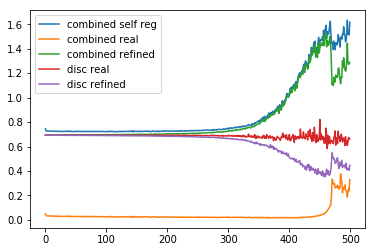

In [265]:
plt.plot([x[0] for x in combined_loss[::(k_g*log_interval)]], label='combined self reg')
plt.plot([x[1] for x in combined_loss[::(k_g*log_interval)]], label='combined real')
plt.plot([x[2] for x in combined_loss[::(k_g*log_interval)]], label='combined refined')
plt.plot(disc_loss_real[::k_d*log_interval], label='disc real')
plt.plot(disc_loss_refined[::k_d*log_interval], label='disc refined')
plt.legend()

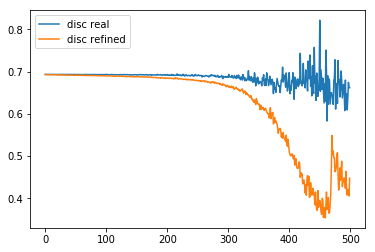

In [266]:
plt.plot(disc_loss_real[::log_interval], label='disc real')
plt.plot(disc_loss_refined[::log_interval], label='disc refined')
plt.legend()

In [267]:
synthetic_image_batch = next(synthetic_generator)
refined_batch = refiner_model.predict_on_batch(synthetic_image_batch)

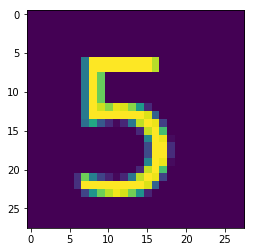

In [268]:
plt.imshow(synthetic_image_batch[0,0])

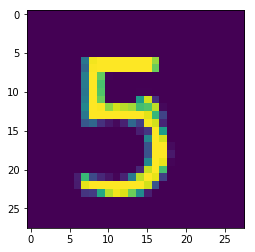

In [269]:
plt.imshow(refined_batch[0,0])

# MNIST Trained Only From SimGAN Refiner

In [275]:
x_refined = refiner_model.predict(x_synth)

In [276]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape, data_format='channels_first'))
model.add(Conv2D(64, (3, 3), activation='relu', data_format='channels_first'))
model.add(MaxPooling2D(pool_size=(2, 2), data_format='channels_first'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_refined, y_synth,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 20000 samples, validate on 10000 samples
Epoch 1/12
20000/20000 [==============================] - 7s 371us/step - loss: 0.1571 - acc: 0.9506 - val_loss: 5.0102 - val_acc: 0.2847
Epoch 2/12
20000/20000 [==============================] - 3s 152us/step - loss: 0.0014 - acc: 0.9998 - val_loss: 6.3683 - val_acc: 0.2881
Epoch 3/12
20000/20000 [==============================] - 3s 152us/step - loss: 4.0753e-04 - acc: 1.0000 - val_loss: 6.9978 - val_acc: 0.2742
Epoch 4/12
20000/20000 [==============================] - 3s 152us/step - loss: 3.2396e-04 - acc: 1.0000 - val_loss: 7.1394 - val_acc: 0.2867
Epoch 5/12
20000/20000 [==============================] - 3s 153us/step - loss: 1.8271e-04 - acc: 1.0000 - val_loss: 7.4468 - val_acc: 0.2824
Epoch 6/12
20000/20000 [==============================] - 3s 152us/step - loss: 1.2587e-04 - acc: 1.0000 - val_loss: 7.5420 - val_acc: 0.2760
Epoch 7/12
20000/20000 [==============================] - 3s 152us/step - loss: 1.2276e-04 - acc: 1.0000 -

# Domain Visualization

In [277]:
!pip install cmake

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [278]:
!pip install MulticoreTSNE

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [279]:
!nproc

4


In [280]:
from MulticoreTSNE import MulticoreTSNE as TSNE

def sample(a):
    c = np.random.choice(range(a.shape[0]), 5000, replace=False)
    return a[c]

tsne_dataset = np.concatenate([
    sample(x_train.reshape(-1, 784)),
    sample(x_synth.reshape(-1, 784)),
    sample(x_refined.reshape(-1, 784)),
])

tsne_dataset.shape

(15000, 784)

In [281]:
x_tsne = TSNE(n_jobs=4, verbose=1).fit_transform(tsne_dataset)

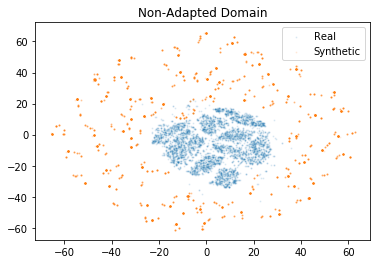

In [282]:
plt.scatter(x_tsne[:5000,0], x_tsne[:5000,1], label='Real', alpha=0.1, s=1)
plt.scatter(x_tsne[5000:10000,0], x_tsne[5000:10000,1], label='Synthetic', alpha=0.1, s=1)
plt.title('Non-Adapted Domain')
plt.legend()

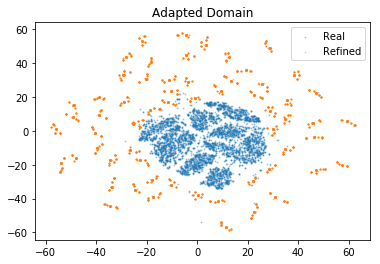

In [283]:
plt.scatter(x_tsne[:5000,0], x_tsne[:5000,1], label='Real', alpha=0.3, s=1)
plt.scatter(x_tsne[10000:,0], x_tsne[10000:,1], label='Refined', alpha=0.3, s=1)
plt.title('Adapted Domain')
plt.legend()

# References & Additional Reading

- Wang, M., & Deng, W. (n.d.). Deep Visual Domain Adaptation: A Survey. Retrieved from https://arxiv.org/pdf/1802.03601.pdf
- Isola, P., Zhu, J.-Y., Zhou, T., Efros, A. A., & Research, B. A. (n.d.). Image-to-Image Translation with Conditional Adversarial Networks. Retrieved from https://github.com/phillipi/pix2pix.
- Kurmi, V. K., & Namboodiri, V. P. (n.d.). Looking back at Labels: A Class based Domain Adaptation Technique. Retrieved from https://vinodkkurmi.github.io/DiscriminatorDomainAdaptation
- Vu, T.-H., Jain, H., Bucher, M., Cord, M., & Pérez, P. (2019). DADA: Depth-aware Domain Adaptation in Semantic Segmentation. Retrieved from http://arxiv.org/abs/1904.01886
- Tan, J., Zhang, T., Coumans, E., Iscen, A., Bai, Y., Hafner, D., … Deepmind, G. (n.d.). Sim-to-Real: Learning Agile Locomotion For Quadruped Robots. Retrieved from https://arxiv.org/pdf/1804.10332.pdf
- Zakharov, S., Kehl, W., & Ilic, S. (2019). DeceptionNet: Network-Driven Domain Randomization. Retrieved from http://arxiv.org/abs/1904.02750
- Pashevich, A., Strudel, R. A. M., Kalevatykh, I., Laptev, I., & Schmid, C. (n.d.). Learning to Augment Synthetic Images for Sim2Real Policy Transfer. Retrieved from https://arxiv.org/pdf/1903.07740.pdf
- Hoffman, J., Wang, D., Yu, F., & Darrell, T. (n.d.). FCNs in the Wild: Pixel-level Adversarial and Constraint-based Adaptation. Retrieved from https://arxiv.org/pdf/1612.02649.pdf
- Zhu, J.-Y., Park, T., Isola, P., Efros, A. A., & Research, B. A. (n.d.). Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks Monet Photos. Retrieved from https://arxiv.org/pdf/1703.10593.pdf
- Zhao, H., Zhang, S., Wu, G., Moura, J. M. F., Costeira, J. P., & Gordon, G. J. (2018). Adversarial Multiple Source Domain Adaptation (pp. 8559–8570). pp. 8559–8570. Retrieved from https://papers.nips.cc/paper/8075-adversarial-multiple-source-domain-adaptation
- Zhao, H., Zhang, S., Wu, G., Costeira, J. P., Moura, J. M. F., & Gordon, G. J. (2017). Multiple Source Domain Adaptation with Adversarial Training of Neural Networks. Retrieved from http://arxiv.org/abs/1705.09684
- Guo, J., Shah, D. J., & Barzilay, R. (2018). Multi-Source Domain Adaptation with Mixture of Experts. Retrieved from http://arxiv.org/abs/1809.02256
- Chapelle, O., Schölkopf, B., & Zien, A. (n.d.). Semi-Supervised Learning edited by. Retrieved from http://www.acad.bg/ebook/ml/MITPress- SemiSupervised Learning.pdf
- Papernot, N., Song, S., Mironov, I., Raghunathan, A., Talwar, K., & Erlingsson, Ú. (2018). Scalable Private Learning with PATE. Retrieved from http://arxiv.org/abs/1802.08908
- Papernot, N., Abadi, M., Erlingsson, Ú., Goodfellow, I., & Talwar, K. (2016). Semi-supervised Knowledge Transfer for Deep Learning from Private Training Data. Retrieved from http://arxiv.org/abs/1610.05755
- Xie, Q., Dai, Z., Hovy, E., Luong, M.-T., & Le, Q. V. (2019). Unsupervised Data Augmentation. Retrieved from http://arxiv.org/abs/1904.12848
- Berthelot, D., Carlini, N., Goodfellow, I., Papernot, N., Oliver, A., & Raffel, C. (2019). MixMatch: A Holistic Approach to Semi-Supervised Learning. Retrieved from http://arxiv.org/abs/1905.02249
- Oliver, A., Odena, A., Raffel, C., Cubuk, E. D., & Goodfellow Google Brain, I. J. (n.d.). Realistic Evaluation of Deep Semi-Supervised Learning Algorithms. Retrieved from https://github.com/brain-research/realistic-ssl-evaluation
- Zhang, Y., David, P., & Gong, B. (n.d.). Curriculum Domain Adaptation for Semantic Segmentation of Urban Scenes. Retrieved from https://github.com/YangZhang4065/AdaptationSeg.
- Gaidon, A., Wang, Q., Cabon, Y., & Vig, E. (n.d.). Virtual Worlds as Proxy for Multi-Object Tracking Analysis. Retrieved from http://www.xrce.xerox.com/
- Tzeng, E., Hoffman, J., Zhang, N., Saenko, K., & Darrell, T. (n.d.). Deep Domain Confusion: Maximizing for Domain Invariance. Retrieved from https://arxiv.org/pdf/1412.3474.pdf
- Sankaranarayanan, S., Balaji, Y., Jain, A., Lim, S. N., & Chellappa, R. (n.d.). Learning from Synthetic Data: Addressing Domain Shift for Semantic Segmentation. Retrieved from https://arxiv.org/pdf/1711.06969.pdf
- Lee, K.-H., Ros, G., Li, J., & Gaidon, A. (2018). SPIGAN: Privileged Adversarial Learning from Simulation. Retrieved from http://arxiv.org/abs/1810.03756
- Bousmalis, K., Trigeorgis, G., Silberman, N., Krishnan, D., & Erhan, D. (n.d.). Domain Separation Networks. Retrieved from https://arxiv.org/pdf/1608.06019.pdf
- Shrivastava, A., Pfister, T., Tuzel, O., Susskind, J., Wang, W., & Webb, R. (2016). Learning from Simulated and Unsupervised Images through Adversarial Training. Retrieved from http://arxiv.org/abs/1612.07828
- Sankaranarayanan, S., Balaji, Y., Castillo, C. D., & Chellappa, R. (n.d.). Generate To Adapt: Aligning Domains using Generative Adversarial Networks. Retrieved from https://arxiv.org/pdf/1704.01705.pdf
- Ganin, Y., Lempitsky, V., & Ru, L. (n.d.). Unsupervised Domain Adaptation by Backpropagation. Retrieved from http://proceedings.mlr.press/v37/ganin15.pdf
- Bousmalis, K., Silberman, N., Research, G., York, N., Dohan, D., Erhan, D., … Krishnan, D. (n.d.). Unsupervised Pixel-Level Domain Adaptation with Generative Adversarial Networks. Retrieved from https://arxiv.org/pdf/1612.05424.pdf
- Sankaranarayanan, S., Balaji, Y., Jain, A., Lim, S. N., & Chellappa, R. (n.d.). Learning from Synthetic Data: Addressing Domain Shift for Semantic Segmentation. Retrieved from https://arxiv.org/pdf/1711.06969.pdf
- Kouw, W. M., & Loog, M. (2019). An introduction to domain adaptation and transfer learning. Retrieved from https://arxiv.org/pdf/1812.11806.pdf